In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
#Dataset input read
df = pd.read_csv(r'/content/drive/MyDrive/FY_Project/OLIDv1.0/olid_dataset.tsv',sep="\t") 

In [ ]:
#Sample dataset
df.head(10)

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND


In [ ]:
#Shape of the dataset
df.shape

(13240, 5)

In [ ]:
#Deleting the id as it adds no value in the model training
del df["id"]

In [ ]:
#Installing the contractions library
!pip install contractions

     |████████████████████████████████| 327kB 5.2MB/s 
     |████████████████████████████████| 286kB 23.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85400 sha256=d275be02e5b5e9589ca85ca5fbc7c664dbc1c16454aa29e25a722587ac409e03
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
#importing required libraries
import json
import nltk
import inflect
from bs4 import BeautifulSoup
import contractions
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Downloading the necessary packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# First function is used to denoise text
def denoise_text(text):
    # Strip html if any. For ex. removing <html>, <p> tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Replace contractions in the text. For ex. didn't -> did not
    text = contractions.fix(text)
    return text

# Check the function 
sample_text = "<p>he didn't say anything </br> about what's gonna <html> happen in the climax"
denoise_text(sample_text)

'he did not say anything  about what is going to  happen in the climax'

In [ ]:
# Text normalization includes many steps.
# Each function below serves a step.

In [ ]:
# Gets rid of the non ASCII characters
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# Converts the entire text to lowercase
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Check the function 
sample_text = "He anyThing"
to_lowercase(sample_text)

['h', 'e', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g']

In [ ]:
# Removes the punctuation marks
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Check the function 
sample_text = "He! anyThing?"
remove_punctuation(sample_text)

['H', 'e', ' ', 'a', 'n', 'y', 'T', 'h', 'i', 'n', 'g']

In [ ]:
# Numbers to their textual representation
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

# Check the function 
sample_text = "0Hi 4 2 21"
replace_numbers(sample_text)

['zero', 'H', 'i', ' ', 'four', ' ', 'two', ' ', 'two', 'one']

In [ ]:
#Using contractions dictionary to convert abbreviations into normal form. For Eg:lol converted into laughing out loud
abbreviations_path="/content/drive/MyDrive/FY_Project/abbreviations_wordlist.json"
abbreviations = json.load(open(abbreviations_path))
def contract_exp(words):
  new_words = []
  for word in words:
    if type(word) is str:
      for key in abbreviations:
        value = abbreviations[key]
        raw_text = r'\b' + key + r'\b'
        word = re.sub(raw_text, value, word)
    new_words.append(word)
  return new_words

In [ ]:
# Removes stop words
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [ ]:
# Lemmatizes verbs in the list of tokenized words
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
#All above functions are put together
def normalize_text(words):
  
  words = remove_non_ascii(words)
  words = to_lowercase(words)
  words = remove_punctuation(words)
  words = replace_numbers(words)
  words = contract_exp(words)
  words = remove_stopwords(words)
  words = lemmatize_verbs(words)
  return words

In [ ]:
# Tokenize tweet into words
def tokenize(text):
    return nltk.word_tokenize(text)
# check the function
sample_text = 'he did not say anything  about what is going to  happen'
print("tokenize results :", tokenize(sample_text))

tokenize results : ['he', 'did', 'not', 'say', 'anything', 'about', 'what', 'is', 'going', 'to', 'happen']


In [ ]:
#text_prepare function
def text_prepare(text):
    text = denoise_text(text)
    text = ' '.join([x for x in normalize_text(tokenize(text))])
    return text
text_prepare("Hello world going patna ?!H 21 lol")


'hello world go patna h twenty-one laughing out loud'

In [ ]:
#Text Preparation to use them into model
df['tweet'] = [text_prepare(x) for x in df['tweet']]

#Sample dataset after text_prepare
df.head()

,tweet,subtask_a,subtask_b,subtask_c
0,user ask native americans take,OFF,UNT,NaN
1,user user go home drink user maga trump2020 url,OFF,TIN,IND
2,amazon investigate chinese employees sell inte...,NOT,NaN,NaN
3,user someone shouldvetaken piece shit volcano,OFF,UNT,NaN
4,user user obama want liberals illegals move re...,NOT,NaN,NaN


In [ ]:
#Creating Embedding dictionary for all the words present in twitter glove file
embeddings_dictionary = dict()
glove_file = open(r'/content/drive/MyDrive/FY_Project/glove.twitter.27B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
#Importing packages from Tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Level-1 classification starts here

In [ ]:
#Class counts
df["subtask_a"].value_counts()

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

In [ ]:
df1=df

In [ ]:
#Input dataset
X=df1['tweet']

In [ ]:
#Class counts
df1["subtask_a"].value_counts()

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

In [ ]:
#Y represents the class of the dataset
Y = df1["subtask_a"]
#0 represents NOT and 1 represents OFF
Y = (Y=="OFF").astype(int)
classes1=["NOT","OFF"]
#Class counts
(Y==0).sum(),(Y==1).sum()

(8840, 4400)

In [ ]:
#Splitting the dataset into training and testing datasets resp. withe a ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((10592,), (10592,), (2648,), (2648,))

In [ ]:
#No of instances with the classification class as "OFF"
(Y_train==1).sum()

3526

In [ ]:
#Resetting the indices of the split datasets
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)

In [ ]:
#X_test instances
X_test.head()

0                            user bet liberal democrat
1    user user epitome low leave go sewers go low p...
2    user need know human know mac many years relat...
3    user user user way conservatives look way appr...
4    user diane feinstein maxine water hillary clin...
Name: tweet, dtype: object

In [ ]:
#Corresponding Y_test instances
Y_test.head()

0    0
1    0
2    1
3    1
4    0
Name: subtask_a, dtype: int64

In [ ]:
#Fitting tokenizer with training data
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(X_train)

#Texts converted to sequences
X_train_seq = tokenizer1.texts_to_sequences(X_train)
X_test_seq = tokenizer1.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer1.word_index) + 1

maxlen = 100

#Padding sequences to get same length sequences
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

In [ ]:
#Creating embedding matrix(vocabulory) for all the words in tokenizer
embedding_matrix = np.zeros((vocab_size, 200))
for word, index in tokenizer1.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
#Importing keras sequential model and layers to be added
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,SpatialDropout1D,Dropout

In [ ]:
#Adding all the layers dropout, bidirectional lstm, dense, embedding layers to the sequential model
#Output layer has sigmoid function to classify into two labels.
model1 = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model1.add(embedding_layer)
model1.add(SpatialDropout1D(0.4))
model1.add(Bidirectional(LSTM(32,activation='tanh',return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(32,activation='tanh',return_sequences=False)))
model1.add(Dropout(0.2))
model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compiling the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
#Summary of the trained model
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 200)          2890200   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 200)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 64)           59648     
_________________________________________________________________
dropout (Dropout)            (None, 100, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               6

In [ ]:
#Training the model with training dataset and validating it on testing dataset
history = model1.fit(X_train_padded, Y_train, batch_size=64, epochs=8, verbose=1, validation_split=0.2)

#Evaluating the testing dataset on the trained model
score = model1.evaluate(X_test_padded, Y_test, verbose=1)

Epoch 1/8
133/133 [==============================] - 38s 226ms/step - loss: 0.6231 - acc: 0.6752 - val_loss: 0.5135 - val_acc: 0.7584
Epoch 2/8
133/133 [==============================] - 28s 208ms/step - loss: 0.5201 - acc: 0.7441 - val_loss: 0.4925 - val_acc: 0.7655
Epoch 3/8
133/133 [==============================] - 28s 214ms/step - loss: 0.4894 - acc: 0.7713 - val_loss: 0.4823 - val_acc: 0.7673
Epoch 4/8
133/133 [==============================] - 28s 210ms/step - loss: 0.4799 - acc: 0.7767 - val_loss: 0.4810 - val_acc: 0.7711
Epoch 5/8
133/133 [==============================] - 28s 211ms/step - loss: 0.4784 - acc: 0.7767 - val_loss: 0.4732 - val_acc: 0.7749
Epoch 6/8
133/133 [==============================] - 28s 211ms/step - loss: 0.4720 - acc: 0.7786 - val_loss: 0.4707 - val_acc: 0.7815
Epoch 7/8
133/133 [==============================] - 28s 211ms/step - loss: 0.4528 - acc: 0.7942 - val_loss: 0.4708 - val_acc: 0.7730
Epoch 8/8
83/83 [==============================] - 3s 38ms/ste

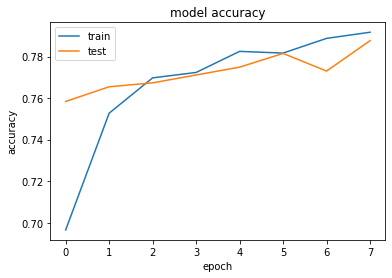

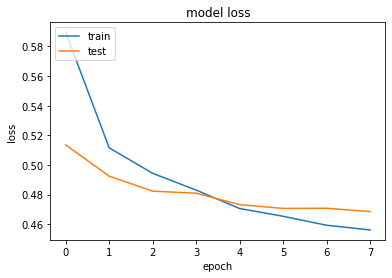

In [ ]:
#importing library for plotting graph
import matplotlib.pyplot as plt

#Plotting Model accuracy on training and testing dataset with epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Plotting Model Loss on training and testing dataset with epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.48984354734420776
Test Accuracy: 0.7779456377029419


In [ ]:
#Predicting padded testing dataset
Y_pred=model1.predict(X_test_padded)

In [ ]:
#Checking the shape of the Y_pred vector and the Y_test vector
Y_pred.shape,Y_test.shape

((2648, 1), (2648,))

In [ ]:
#Making the shape of the Y_pred vector same as the Y_test vector
Y_pred=Y_pred.reshape(Y_pred.shape[0])

(array([989., 337., 217., 201., 148., 121., 135., 152., 187., 161.]),
 array([0.01131633, 0.10228217, 0.193248  , 0.28421384, 0.37517968,
        0.46614552, 0.5571114 , 0.6480772 , 0.73904306, 0.83000886,
        0.92097473], dtype=float32),
 <a list of 10 Patch objects>)

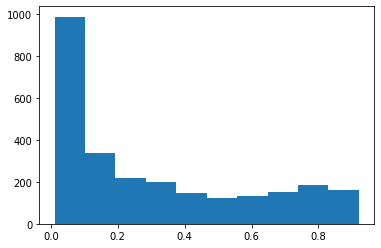

In [ ]:
#Plotting histogram of Y_pred
plt.hist(Y_pred)

In [ ]:
#Calculating cutoff for labels using Kolmogorov-Smirnov(KS)
cutoffs=np.linspace(0.01,0.99,99)
KS_all=[]
for cutoff in cutoffs:
    predicted=(Y_pred>cutoff).astype(int)    #Predicted value
    real=Y_test                                  #Real value

    TP=((predicted==1) & (real==1)).sum()        #True Positive
    TN=((predicted==0) & (real==0)).sum()        #True Negative
    FP=((predicted==1) & (real==0)).sum()        #False Positive
    FN=((predicted==0) & (real==1)).sum()        #False Negative
    
    P=TP+FN                                      #Positives(real)
    N=TN+FP                                      #Negatives(real)
    
    KS=(TP/P)-(FP/N)                             #KS value
    
    KS_all.append(KS)                            #KS values for all cutoffs

mycutoff1=cutoffs[KS_all==max(KS_all)][0]        #Cutoff with maximum KS value
print("KS-score =",max(KS_all),"  MyCutoff =",mycutoff1)

KS-score = 0.47462198705429814   MyCutoff = 0.29000000000000004


In [ ]:
predicted=(Y_pred>mycutoff1).astype(int)     #Predicted value
real=Y_test                                  #Real value
Precision_sum=0
Recall_sum=0

for i in range(len(classes1)):
  print("For class :",classes1[i])
  TP=((predicted==i) & (real==i)).sum()        #True Positive
  TN=((predicted!=i) & (real!=i)).sum()        #True Negative
  FP=((predicted==i) & (real!=i)).sum()        #False Positive
  FN=((predicted!=i) & (real==i)).sum()        #False Negative

  P=TP+FN                                      #Positives(real)
  N=TN+FP                                      #Negatives(real)

  Total=P+N                                    #Total tuples

  #Calculating all metrices
  Accuracy=(TP+TN)/Total
  Sensitivity=TP/P
  Specificity=TN/N
  Precision=TP/(TP+FP)
  Precision_sum+=Precision
  Recall=TP/P
  Recall_sum+=Recall
  KS=(TP/P)-(FP/N) 
  F1=2*Precision*Recall/(Precision+Recall)

  print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN,"P:",P,"N:",N,"Total:",Total)
  print("Accuracy    =",Accuracy)
  print("Sensitivity =",Sensitivity)
  print("Specificity =",Specificity)
  print("Precision   =",Precision)
  print("Recall      =",Recall)
  print("KS          =",KS)
  print("F1          =",F1)
  print()

#Global
Precision=Precision_sum/len(classes1)
Recall=Recall_sum/len(classes1)
F1=2*Precision*Recall/(Precision+Recall)

print("Global Metrics:")
print("Accuracy    =",Accuracy)
print("Precision   =",Precision)
print("Recall      =",Recall)
print("KS          =",KS)
print("F1          =",F1)

For class : NOT
TP: 1321 TN: 638 FP: 236 FN: 453 P: 1774 N: 874 Total: 2648
Accuracy    = 0.7398036253776435
Sensitivity = 0.7446448703494927
Specificity = 0.7299771167048055
Precision   = 0.8484264611432242
Recall      = 0.7446448703494927
KS          = 0.47462198705429814
F1          = 0.7931552086460523

For class : OFF
TP: 638 TN: 1321 FP: 453 FN: 236 P: 874 N: 1774 Total: 2648
Accuracy    = 0.7398036253776435
Sensitivity = 0.7299771167048055
Specificity = 0.7446448703494927
Precision   = 0.5847846012832264
Recall      = 0.7299771167048055
KS          = 0.47462198705429814
F1          = 0.6493638676844783

Global Metrics:
Accuracy    = 0.7398036253776435
Precision   = 0.7166055312132253
Recall      = 0.7373109935271491
KS          = 0.47462198705429814
F1          = 0.7268108274375972


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(real,predicted,target_names=classes1))

              precision    recall  f1-score   support

         NOT       0.85      0.74      0.79      1774
         OFF       0.58      0.73      0.65       874

    accuracy                           0.74      2648
   macro avg       0.72      0.74      0.72      2648
weighted avg       0.76      0.74      0.75      2648



In [ ]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 6.7MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


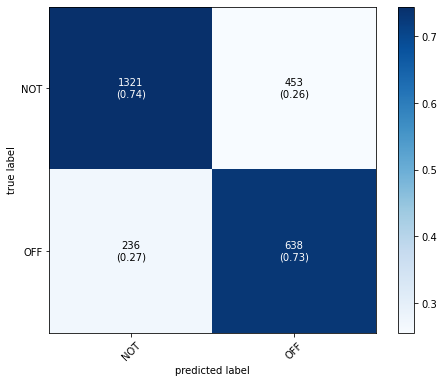

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

mat=confusion_matrix(Y_test, predicted)
fig, ax = plot_confusion_matrix(conf_mat=mat,figsize=(8,6),colorbar=True,show_normed=True,class_names=classes1)
plt.show()

In [ ]:
#Predicting tweets
instance = df['tweet'][9]
print(instance)
instance=text_prepare(instance)
instance_seq = tokenizer1.texts_to_sequences([instance])

instance_padded = pad_sequences(instance_seq, padding='post', maxlen=maxlen)

pred=model1.predict(instance_padded)
print(pred)
classes1[int(pred[0,0]>mycutoff1)],df['subtask_a'][9]

user canada need another cuck already enough looneyleft liberals fking great country qproofs trudeaumustgo
[[0.71284235]]


('OFF', 'OFF')

**2nd** level classification starts here...

In [ ]:
#Dataset import
df2=df.loc[df["subtask_b"].notnull()]
df2.reset_index(inplace=True,drop=True)

In [ ]:
#Sample data
df2.head()

,tweet,subtask_a,subtask_b,subtask_c
0,user ask native americans take,OFF,UNT,NaN
1,user user go home drink user maga trump2020 url,OFF,TIN,IND
2,user someone shouldvetaken piece shit volcano,OFF,UNT,NaN
3,user liberals kookoo,OFF,TIN,OTH
4,user user oh noes tough shit,OFF,UNT,NaN


In [ ]:
#Shape of the dataset
df2.shape

(4400, 4)

In [ ]:
#Class counts
df2["subtask_b"].value_counts()

TIN    3876
UNT     524
Name: subtask_b, dtype: int64

In [ ]:
#Input data for the level 2 classification
X=df2["tweet"]

In [ ]:
#Y is the output class with value 0 if it is untargeted else 1
Y=df2['subtask_b'].apply(lambda x: 0 if x =='UNT' else 1)
#2 classes at level 2
classes2=["UNT","TIN"]
#Class count
(Y==0).sum(),(Y==1).sum()

(524, 3876)

In [ ]:
#Splitting the training and testing datset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
#Resetting the indices of the split dataset
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)

In [ ]:
#Fitting tokenizer with training data
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(X_train)

#Texts converted to sequences
X_train_seq = tokenizer2.texts_to_sequences(X_train)
X_test_seq = tokenizer2.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer2.word_index) + 1

maxlen = 100

#Padding sequences to get same length sequences
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

In [ ]:
#Creating embedding matrix(vocabulory) for all the words in tokenizer
embedding_matrix = np.zeros((vocab_size, 200))
for word, index in tokenizer2.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
#Adding all the layers dropout, bidirectional lstm, dense, embedding layers to the sequential model
#Output layer has sigmoid function to classify into two labels.
model2 = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model2.add(embedding_layer)
model2.add(SpatialDropout1D(0.3))
model2.add(Bidirectional(LSTM(32,activation='tanh',return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(32,activation='tanh',return_sequences=False)))
model2.add(Dropout(0.2))
model2.add(Dense(100,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compiling the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
#Summary of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 200)          1538400   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 200)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 64)           59648     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

In [ ]:
#Training the model with training dataset and validating it on testing dataset
history = model2.fit(X_train_padded, Y_train, batch_size=64, epochs=8, verbose=1, validation_split=0.2)
#Evaluating the testing dataset on the trained model
score = model2.evaluate(X_test_padded, Y_test, verbose=1)

Epoch 1/8
44/44 [==============================] - 16s 222ms/step - loss: 0.4928 - acc: 0.8297 - val_loss: 0.3291 - val_acc: 0.8949
Epoch 2/8
44/44 [==============================] - 8s 176ms/step - loss: 0.3716 - acc: 0.8764 - val_loss: 0.3262 - val_acc: 0.8949
Epoch 3/8
44/44 [==============================] - 8s 181ms/step - loss: 0.3454 - acc: 0.8849 - val_loss: 0.3233 - val_acc: 0.8949
Epoch 4/8
44/44 [==============================] - 8s 177ms/step - loss: 0.3498 - acc: 0.8742 - val_loss: 0.3159 - val_acc: 0.8949
Epoch 5/8
44/44 [==============================] - 8s 180ms/step - loss: 0.3387 - acc: 0.8824 - val_loss: 0.3208 - val_acc: 0.8935
Epoch 6/8
44/44 [==============================] - 8s 180ms/step - loss: 0.3565 - acc: 0.8690 - val_loss: 0.3251 - val_acc: 0.8920
Epoch 7/8
44/44 [==============================] - 8s 190ms/step - loss: 0.3173 - acc: 0.8805 - val_loss: 0.3227 - val_acc: 0.8935
Epoch 8/8
28/28 [==============================] - 3s 39ms/step - loss: 0.3827 - a

In [ ]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.3827207684516907
Test Accuracy: 0.8818181753158569


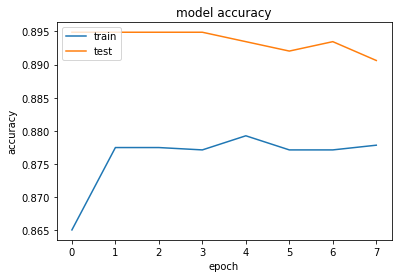

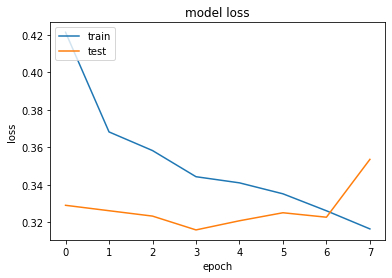

In [ ]:
import matplotlib.pyplot as plt

#Plotting Model accuracy on training and testing dataset with epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Plotting Model Loss on training and testing dataset with epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Predicting padded testing dataset
Y_pred=model2.predict(X_test_padded)

In [ ]:
#Checking the shape of the Y_pred vector and the Y_test vector
Y_pred.shape,Y_test.shape

((880, 1), (880,))

In [ ]:
#Making the shape of the Y_pred vector same as the Y_test vector
Y_pred=Y_pred.reshape(Y_pred.shape[0])

(array([ 11.,   9.,   7.,  12.,  11.,   8.,  11.,  32.,  72., 707.]),
 array([0.44331604, 0.4980891 , 0.55286217, 0.6076352 , 0.66240823,
        0.7171813 , 0.77195436, 0.8267274 , 0.8815004 , 0.9362735 ,
        0.99104655], dtype=float32),
 <a list of 10 Patch objects>)

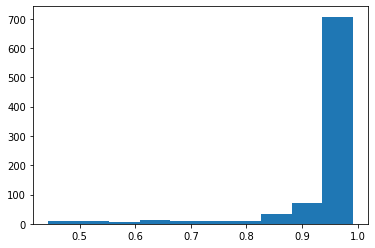

In [ ]:
#Plotting the histogram of the test score
plt.hist(Y_pred)

In [ ]:
#Calculating cutoff for labels using Kolmogorov-Smirnov(KS)
cutoffs=np.linspace(0.01,0.99,99)
KS_all=[]
for cutoff in cutoffs:
    predicted=(Y_pred>cutoff).astype(int)        #Predicted value
    real=Y_test                                  #Real value

    TP=((predicted==1) & (real==1)).sum()        #True Positive
    TN=((predicted==0) & (real==0)).sum()        #True Negative
    FP=((predicted==1) & (real==0)).sum()        #False Positive
    FN=((predicted==0) & (real==1)).sum()        #False Negative
    
    P=TP+FN                                      #Positives(real)
    N=TN+FP                                      #Negatives(real)
    
    KS=(TP/P)-(FP/N)                             #KS value
    
    KS_all.append(KS)                            #KS values for all cutoffs

mycutoff2=cutoffs[KS_all==max(KS_all)][0]        #Cutoff with maximum KS value
print("KS-score",max(KS_all),"MyCutoff=",mycutoff1)

KS-score 0.26494623655913974 MyCutoff= 0.29000000000000004


In [ ]:
predicted=(Y_pred>mycutoff1).astype(int)      #Predicted value
real=Y_test                                   #Real value
Precision_sum=0
Recall_sum=0

for i in range(len(classes2)):
  print("For class :",classes2[i])
  TP=((predicted==i) & (real==i)).sum()        #True Positive
  TN=((predicted!=i) & (real!=i)).sum()        #True Negative
  FP=((predicted==i) & (real!=i)).sum()        #False Positive
  FN=((predicted!=i) & (real==i)).sum()        #False Negative

  P=TP+FN                                      #Positives(real)
  N=TN+FP                                      #Negatives(real)

  Total=P+N                                    #Total tuples

  #Calculating all metrices
  Accuracy=(TP+TN)/Total
  Sensitivity=TP/P
  Specificity=TN/N
  Precision=TP/(TP+FP)
  Precision_sum+=Precision
  Recall=TP/P
  Recall_sum+=Recall
  KS=(TP/P)-(FP/N) 
  F1=2*Precision*Recall/(Precision+Recall)

  print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN,"P:",P,"N:",N,"Total:",Total)
  print("Accuracy    =",Accuracy)
  print("Sensitivity =",Sensitivity)
  print("Specificity =",Specificity)
  print("Precision   =",Precision)
  print("Recall      =",Recall)
  print("KS          =",KS)
  print("F1          =",F1)
  print()

#Global
Precision=Precision_sum/len(classes2)
Recall=Recall_sum/len(classes2)
F1=2*Precision*Recall/(Precision+Recall)

print("Global Metrics:")
print("Accuracy    =",Accuracy)
print("Precision   =",Precision)
print("Recall      =",Recall)
print("KS          =",KS)
print("F1          =",F1)

For class : UNT
TP: 0 TN: 775 FP: 0 FN: 105 P: 105 N: 775 Total: 880
Accuracy    = 0.8806818181818182
Sensitivity = 0.0
Specificity = 1.0
Precision   = nan
Recall      = 0.0
KS          = 0.0
F1          = nan

For class : TIN
TP: 775 TN: 0 FP: 105 FN: 0 P: 775 N: 105 Total: 880
Accuracy    = 0.8806818181818182
Sensitivity = 1.0
Specificity = 0.0
Precision   = 0.8806818181818182
Recall      = 1.0
KS          = 0.0
F1          = 0.9365558912386707

Global Metrics:
Accuracy    = 0.8806818181818182
Precision   = nan
Recall      = 0.5
KS          = 0.0
F1          = nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
print(classification_report(real,predicted,target_names=classes2))

              precision    recall  f1-score   support

         UNT       0.00      0.00      0.00       105
         TIN       0.88      1.00      0.94       775

    accuracy                           0.88       880
   macro avg       0.44      0.50      0.47       880
weighted avg       0.78      0.88      0.82       880



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


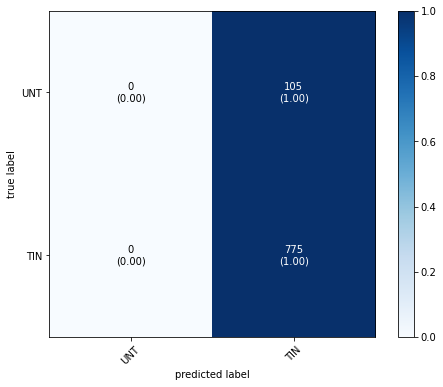

In [ ]:
mat=confusion_matrix(Y_test, predicted)
fig, ax = plot_confusion_matrix(conf_mat=mat,figsize=(8,6),colorbar=True,show_normed=True,class_names=classes2)
plt.show()

In [ ]:
#Predicting Tweets
instance = df['tweet'][9]
print(instance)
instance=text_prepare(instance)
instance_seq = tokenizer2.texts_to_sequences([instance])

instance_padded = pad_sequences(instance_seq, padding='post', maxlen=maxlen)
#print(instance_padded.shape)
pred=model2.predict(instance_padded)
print(pred)
classes2[int(pred[0,0]>mycutoff1)],df['subtask_b'][9]

user canada need another cuck already enough looneyleft liberals fking great country qproofs trudeaumustgo
[[0.9780865]]


('TIN', 'TIN')

**3rd** level classification starts here

In [ ]:
#Importing the datast with the 3rd subtask
df3=df.loc[df["subtask_c"].notnull()]
df3.reset_index(drop=True,inplace=True)

In [ ]:
#Sample dataset
df3.head()

,tweet,subtask_a,subtask_b,subtask_c
0,user user go home drink user maga trump2020 url,OFF,TIN,IND
1,user liberals kookoo,OFF,TIN,OTH
2,user literally talk laughing out loud mass sho...,OFF,TIN,GRP
3,user canada need another cuck already enough l...,OFF,TIN,IND
4,user lie corrupt traitor nobody want hear anym...,OFF,TIN,IND


In [ ]:
#Shape of the dataset
df3.shape

(3876, 4)

In [ ]:
#Class counts
df3["subtask_c"].value_counts()

IND    2407
GRP    1074
OTH     395
Name: subtask_c, dtype: int64

In [ ]:
#Input tweets
X=df3["tweet"]

In [ ]:
#Y represents the vector of 0,1,2
#0 represents OTH,1 represents IND and 2 represents GRP
Y = (df3["subtask_c"]=="IND").astype(int)
Y2 = (df3["subtask_c"]=="GRP").astype(int)*2
Y+=Y2

In [ ]:
#Class counts
Y.value_counts()

1    2407
2    1074
0     395
Name: subtask_c, dtype: int64

In [ ]:
#Class vector
classes3=["OTH","IND","GRP"]

In [ ]:
#Splitting the training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
#Resetting the indices of the split datasets
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)

In [ ]:
#Fitting tokenizer with training data
tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(X_train)

#Text converted to sequences
X_train_seq = tokenizer3.texts_to_sequences(X_train)
X_test_seq = tokenizer3.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer3.word_index) + 1

maxlen = 100

#Padding sequences to get same length sequences
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

In [ ]:
#Creating embedding matrix(vocabulory) for all the words in tokenizer
embedding_matrix = np.zeros((vocab_size, 200))
for word, index in tokenizer3.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
#Adding all the layers dropout, bidirectional lstm, dense, embedding layers to the sequential model
#Output layer has sigmoid function to classify into two labels.
model3 = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model3.add(embedding_layer)
model3.add(SpatialDropout1D(0.4))
model3.add(Bidirectional(LSTM(32,activation='tanh',return_sequences=True)))
model3.add(Dropout(0.3))
model3.add(Bidirectional(LSTM(32,activation='tanh',return_sequences=False)))
model3.add(Dropout(0.2))
model3.add(Dense(100,activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(units=3, activation='softmax'))

In [ ]:
#Compiling the model
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
#Summary of the model
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 200)          1407400   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 200)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 64)           59648     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

In [ ]:
#Training the model with training dataset and validating it on testing dataset
history = model3.fit(X_train_padded, Y_train, batch_size=32, epochs=10, verbose=1,validation_split=0.2)
#Evaluating the testing dataset on the trained model
score = model3.evaluate(X_test_padded, Y_test, verbose=1)

Epoch 1/10
78/78 [==============================] - 25s 178ms/step - loss: 0.9424 - sparse_categorical_accuracy: 0.5966 - val_loss: 0.7927 - val_sparse_categorical_accuracy: 0.6339
Epoch 2/10
78/78 [==============================] - 12s 159ms/step - loss: 0.7827 - sparse_categorical_accuracy: 0.6632 - val_loss: 0.7784 - val_sparse_categorical_accuracy: 0.6581
Epoch 3/10
78/78 [==============================] - 12s 160ms/step - loss: 0.7584 - sparse_categorical_accuracy: 0.6827 - val_loss: 0.7585 - val_sparse_categorical_accuracy: 0.6806
Epoch 4/10
78/78 [==============================] - 12s 160ms/step - loss: 0.7230 - sparse_categorical_accuracy: 0.7071 - val_loss: 0.7678 - val_sparse_categorical_accuracy: 0.6823
Epoch 5/10
78/78 [==============================] - 12s 158ms/step - loss: 0.7863 - sparse_categorical_accuracy: 0.6864 - val_loss: 0.7794 - val_sparse_categorical_accuracy: 0.6871
Epoch 6/10
78/78 [==============================] - 13s 161ms/step - loss: 0.7308 - sparse_cate

In [ ]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.7330625057220459
Test Accuracy: 0.7164948582649231


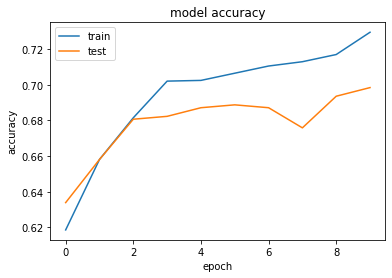

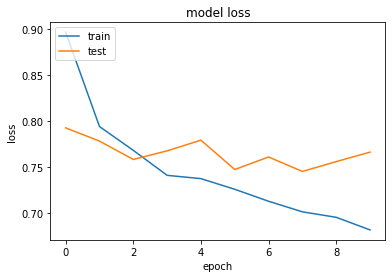

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

#Plotting Model accuracy on training and testing dataset with epochs
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Plotting Model Loss on training and testing dataset with epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Predicting padded testing dataset
Y_pred=model3.predict(X_test_padded)

In [ ]:
#Checking the shape of the Y_pred vector and the Y_test vector
Y_pred.shape,Y_test.shape

((776, 3), (776,))

In [ ]:
predicted=Y_pred.argmax(axis=1)              #Predicted value
real=Y_test                                  #Real value
Precision_sum=0
Recall_sum=0
Accuracy_sum=0

for i in range(len(classes3)):
  print("For class :",classes3[i])
  TP=((predicted==i) & (real==i)).sum()        #True Positive
  TN=((predicted!=i) & (real!=i)).sum()        #True Negative
  FP=((predicted==i) & (real!=i)).sum()        #False Positive
  FN=((predicted!=i) & (real==i)).sum()        #False Negative

  P=TP+FN                                      #Positives(real)
  N=TN+FP                                      #Negatives(real)

  Total=P+N                                    #Total tuples

  #Calculating all metrices
  Accuracy=(TP+TN)/Total
  Accuracy_sum+=Accuracy
  Sensitivity=TP/P
  Specificity=TN/N
  Precision=TP/(TP+FP)
  Precision_sum+=Precision
  Recall=TP/P
  Recall_sum+=Recall
  KS=(TP/P)-(FP/N) 
  F1=2*Precision*Recall/(Precision+Recall)

  print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN,"P:",P,"N:",N,"Total:",Total)
  print("Accuracy    =",Accuracy)
  print("Sensitivity =",Sensitivity)
  print("Specificity =",Specificity)
  print("Precision   =",Precision)
  print("Recall      =",Recall)
  print("KS          =",KS)
  print("F1          =",F1)
  print()

#Global
Precision=Precision_sum/len(classes3)
Recall=Recall_sum/len(classes3)
Accuracy=Accuracy_sum/len(classes3)
F1=2*Precision*Recall/(Precision+Recall)

print("Global Metrics:")
print("Accuracy    =",Accuracy)
print("Precision   =",Precision)
print("Recall      =",Recall)
print("F1          =",F1)

For class : OTH
TP: 3 TN: 686 FP: 12 FN: 75 P: 78 N: 698 Total: 776
Accuracy    = 0.8878865979381443
Sensitivity = 0.038461538461538464
Specificity = 0.9828080229226361
Precision   = 0.2
Recall      = 0.038461538461538464
KS          = 0.021269561384174566
F1          = 0.06451612903225806

For class : IND
TP: 419 TN: 172 FP: 121 FN: 64 P: 483 N: 293 Total: 776
Accuracy    = 0.7615979381443299
Sensitivity = 0.8674948240165632
Specificity = 0.5870307167235495
Precision   = 0.7759259259259259
Recall      = 0.8674948240165632
KS          = 0.4545255407401127
F1          = 0.8191593352883676

For class : GRP
TP: 134 TN: 474 FP: 87 FN: 81 P: 215 N: 561 Total: 776
Accuracy    = 0.7835051546391752
Sensitivity = 0.6232558139534884
Specificity = 0.8449197860962567
Precision   = 0.6063348416289592
Recall      = 0.6232558139534884
KS          = 0.46817560004974507
F1          = 0.6146788990825688

Global Metrics:
Accuracy    = 0.8109965635738831
Precision   = 0.5274202558516284
Recall      = 0.50

In [ ]:
print(classification_report(real,predicted,target_names=classes3))

              precision    recall  f1-score   support

         OTH       0.20      0.04      0.06        78
         IND       0.78      0.87      0.82       483
         GRP       0.61      0.62      0.61       215

    accuracy                           0.72       776
   macro avg       0.53      0.51      0.50       776
weighted avg       0.67      0.72      0.69       776



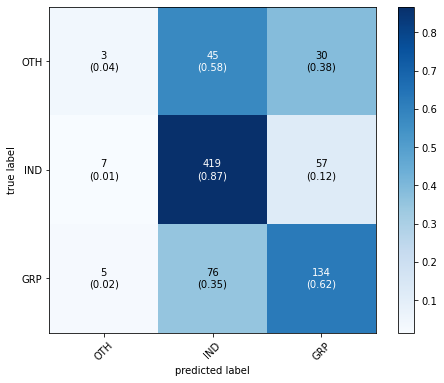

In [ ]:
mat=confusion_matrix(Y_test, predicted)
fig, ax = plot_confusion_matrix(conf_mat=mat,figsize=(8,6),colorbar=True,show_normed=True,class_names=classes3)
plt.show()

In [ ]:
#Predicting Tweets
instance = df['tweet'][15]
print(instance)
instance=text_prepare(instance)
instance_seq = tokenizer3.texts_to_sequences([instance])

instance_padded = pad_sequences(instance_seq, padding='post', maxlen=maxlen)
print(instance_padded.shape)
pred=model3.predict(instance_padded)
print(pred)
classes3[np.argmax(pred)],df['subtask_c'][1]

user also king taste
(1, 100)
[[0.0274781  0.9525121  0.02000977]]


('IND', 'IND')

Combined testing at all the 3 levels

In [ ]:
#Testing model with 3-level classification
def testing_model(instance,tokenizer,model):
  instance=text_prepare(instance)
  instance_seq = tokenizer.texts_to_sequences([instance])
  instance_padded = pad_sequences(instance_seq, padding='post', maxlen=maxlen)

  return model.predict(instance_padded)

In [ ]:
#Method to test an instance at all the 3 levels of classification.
def testing(instance):
  print(instance)
  #Level 1 prediction
  pred=testing_model(instance,tokenizer1,model1)
  print("level1:",pred)
  if pred[0,0]<=mycutoff1:
    print(classes1[0])
  else:
    print(classes1[1])
    #Level 2 prediction
    pred=testing_model(instance,tokenizer2,model2)
    print("level2:",pred)
    if pred[0,0]<=mycutoff2:
      print(classes2[0])
    else:
      print(classes2[1])
      #Level 3 prediction
      pred=testing_model(instance,tokenizer3,model3)
      print("level3:",pred[0])
      k=np.argmax(pred)
      print(classes3[k])
    

In [ ]:
#Testing for an instance at index 9
testing(df['tweet'][9])

user canada need another cuck already enough looneyleft liberals fking great country qproofs trudeaumustgo
level1: [[0.71284235]]
OFF
level2: [[0.9780865]]
TIN
level3: [0.19763176 0.23204951 0.5703187 ]
GRP


In [ ]:
#Output of the instance at index 9
df['subtask_a'][9],df['subtask_b'][9],df['subtask_c'][9]

('OFF', 'TIN', 'IND')

In [ ]:
#Testing custom input data
testing('I am a good boy')

I am a good boy
level1: [[0.06932288]]
NOT


In [ ]:
#Testing custom input data
testing('Bad people are very bad')

Bad people are very bad
level1: [[0.66444933]]
OFF
level2: [[0.68037367]]
UNT


In [ ]:
import pickle

# save tokenizer1 for levelA
with open('/content/drive/MyDrive/FY_Project/Models/BiLSTM/tokenizer1', 'wb') as f:
    pickle.dump(tokenizer1, f, protocol=pickle.HIGHEST_PROTOCOL)

# save tokenizer2 for levelB
with open('/content/drive/MyDrive/FY_Project/Models/BiLSTM/tokenizer2', 'wb') as f:
    pickle.dump(tokenizer2, f, protocol=pickle.HIGHEST_PROTOCOL)

# save tokenizer3 for levelC
with open('/content/drive/MyDrive/FY_Project/Models/BiLSTM/tokenizer3', 'wb') as f:
    pickle.dump(tokenizer3, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model1.save('/content/drive/MyDrive/FY_Project/Models/BiLSTM/levelA')
model2.save('/content/drive/MyDrive/FY_Project/Models/BiLSTM/levelB')
model3.save('/content/drive/MyDrive/FY_Project/Models/BiLSTM/levelC')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/FY_Project/Models/BiLSTM/levelA/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/FY_Project/Models/BiLSTM/levelA/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/FY_Project/Models/BiLSTM/levelB/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/FY_Project/Models/BiLSTM/levelB/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/FY_Project/Models/BiLSTM/levelC/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/FY_Project/Models/BiLSTM/levelC/assets
